In [10]:
# using Pkg
# Pkg.add(url="https://github.com/sdBrinkmann/HPFilter.jl")


In [11]:
using HPFilter

using Random
using LinearAlgebra
using Statistics
using Distributions
using ProgressMeter
using SpecialFunctions
using XLSX


using Plots
using StatsPlots  
using Distributions
using DataFrames

In [12]:

file_path = "quarterly_gdp.xlsx"
sheet_name = "Quarterly GDP"

data = XLSX.readtable(file_path, sheet_name) |> DataFrame

println(data)

num_obs = size(data, 1)
println("Number of observations: ", num_obs)


134×2 DataFrame
 Row │ Date    Value 
     │ Any     Any   
─────┼───────────────
   1 │ 1991K1  364.6
   2 │ 1991K2  364.7
   3 │ 1991K3  368.6
   4 │ 1991K4  364.5
   5 │ 1992K1  371.5
   6 │ 1992K2  367.9
   7 │ 1992K3  377.2
   8 │ 1992K4  375.4
   9 │ 1993K1  371.8
  10 │ 1993K2  370
  11 │ 1993K3  373.2
  12 │ 1993K4  375.7
  13 │ 1994K1  385.1
  14 │ 1994K2  391.5
  15 │ 1994K3  393.3
  16 │ 1994K4  399.8
  17 │ 1995K1  404.2
  18 │ 1995K2  402.5
  19 │ 1995K3  404
  20 │ 1995K4  406.7
  21 │ 1996K1  407.8
  22 │ 1996K2  418.3
  23 │ 1996K3  419
  24 │ 1996K4  419.1
  25 │ 1997K1  424.8
  26 │ 1997K2  431.6
  27 │ 1997K3  429.7
  28 │ 1997K4  430.9
  29 │ 1998K1  437.5
  30 │ 1998K2  434
  31 │ 1998K3  441.2
  32 │ 1998K4  444.1
  33 │ 1999K1  447.8
  34 │ 1999K2  449.8
  35 │ 1999K3  451.7
  36 │ 1999K4  459.7
  37 │ 2000K1  462.9
  38 │ 2000K2  468.1
  39 │ 2000K3  468.9
  40 │ 2000K4  476.5
  41 │ 2001K1  469.1
  42 │ 2001K2  472.2
  43 │ 2001K3  475.3
  44 │ 2001K4  477.7
  

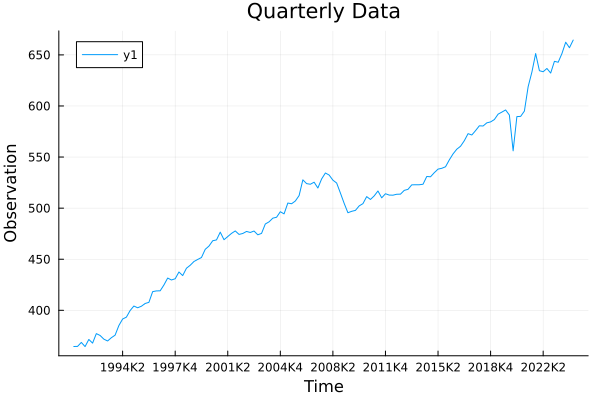

In [13]:
y = data[:, 2]
# y = log.(y)
dates = data[:, 1]

# Plot the data
plot(dates,y, title="Quarterly Data", xlabel="Time", ylabel="Observation")

In [14]:
# HP filter with λ = 1600
hp = HP(y, 1600)
println(size(hp))

# Boosted HP filter with baysian-type information criterion (BIC)
bHP_bic = bHP(y, 1600, Criterion="BIC")

# # Boosted HP filter with augmented Dickey-Fuller (ADF) test 
# bHP_adf = bHP(y, 1600, Criterion="ADF", p=0.01)

(134,)
Number of iterations = 9


134-element Vector{Float64}:
 363.9175388712792
 365.0457391920341
 366.18629365625424
 367.35612171951084
 368.5902426799898
 369.91018255778783
 371.35455102737177
 372.9496239034292
 374.7519616305661
 376.8279461609131
   ⋮
 632.1077172396816
 636.4511019112625
 640.6432455501738
 644.7581397911215
 648.8268005253248
 652.8782450573414
 656.9108069928598
 660.9163433188331
 664.9191043265374

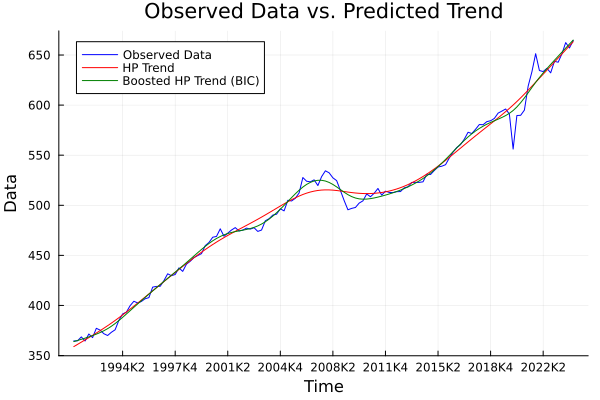

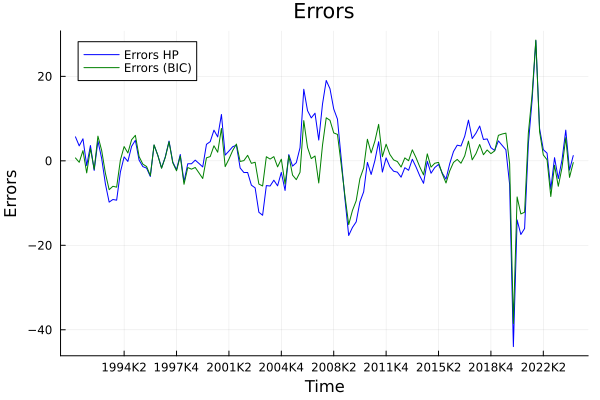

In [15]:






y_pred = hp


p = plot(dates, y, label="Observed Data", color=:blue)
plot!(p, dates, hp, label="HP Trend", color=:red)
xlabel!("Time")
ylabel!("Data")
title!("Observed Data vs. Predicted Trend")
plot!(p, dates, bHP_bic, label="Boosted HP Trend (BIC)", color=:green)
# plot!(p, dates, bHP_adf, label="Boosted HP Trend (ADF)", color=:purple)

display(p)


errors1 = y .- hp
errors2 = y .- bHP_bic
# errors3 = y .- bHP_adf


p_error = plot(dates, errors1, label="Errors HP", color=:blue)
plot!(p_error, dates, errors2, label="Errors (BIC)", color=:green)
# plot!(p_error, dates, errors3, label="Errors (ADF)", color=:purple)
xlabel!("Time")
ylabel!("Errors")
title!("Errors")
display(p_error)


(134,)


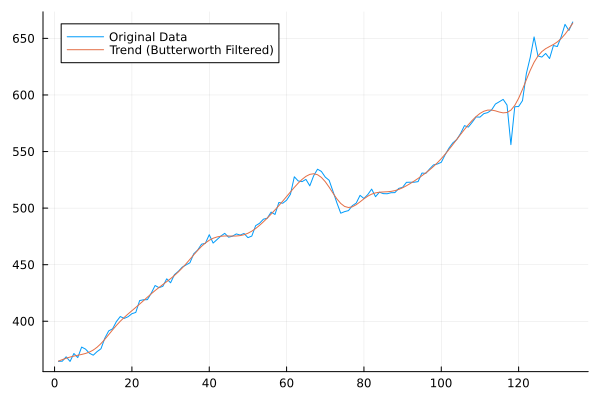

In [16]:
using DSP  # For digital signal processing functions
using Plots  # For plotting (optional)

# Assume y is your time series data, a vector
# y = [your data here]

# Define the sampling frequency (fs) based on your data's frequency
# Examples:
# - Annual data: fs = 1
# - Quarterly data: fs = 4
# - Monthly data: fs = 12
# - Daily data: fs = 365

fs = 4  # Replace with the appropriate value for your data

# Define the cutoff frequency (fc)
# To filter out fluctuations shorter than N periods, set fc = fs / N
N = 12  # Number of periods for the cutoff
fc = fs / N  # Cutoff frequency in the same units as fs

# Ensure the cutoff frequency is valid
if fc >= fs / 2
    error("Cutoff frequency must be less than half the sampling frequency")
end

# Define the filter order
order = 4  # Adjust as needed

# Design the Butterworth low-pass filter
responsetype = Lowpass(fc; fs=fs)
designmethod = Butterworth(order)
butter_filter = digitalfilter(responsetype, designmethod)

# Apply the filter to your data using filtfilt to avoid phase distortion
trend = filtfilt(butter_filter, y)

# Output the size of the trend component
println(size(trend))

# (Optional) Plot the original data and the extracted trend
plot(1:length(y), y, label="Original Data")
plot!(1:length(trend), trend, label="Trend (Butterworth Filtered)")
